In [ ]:
import gradio as gr
from skimage import transform
from tensorflow.python.keras.models import load_model
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

# Tensorflow
import tensorflow as tf
from keras.utils import load_img, img_to_array, to_categorical
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from keras.optimizers import Adam
from keras import Sequential


from gtts import gTTS

import IPython.display as ipd
from IPython.display import Audio

In [ ]:
labels = {0:'Speed limit(20km/h)',
          1:'Speed limit(30km/h)',
          2:'Speed limit(50km/h)',
          3:'Speed limit(60km/h)',
          4:'Speed limit(70km/h)',
          5:'Speed limit(80km/h)',
          6:'End of speed limit(80km/h)',
          7:'Speed limit(100km/h)',
          8:'Speed limit(120km/h)',
          9:'No passing',
          10:'No passing for vehicles over 3.5 metric tons',
          11:'Right-of-way at the next intersection',
          12:'Priority road',
          13:'Yield',
          14:'Stop',
          15:'No vehicles',
          16:'Vehicles over 3.5 metric tons prohibted',
          17:'No entry',
          18:'General caution',
          19:'Dangerous curve to the left',
          20:'Dangerous curve to the right',
          21:'Double curve',
          22:'Bumpy road',
          23:'Slippery road',
          24:'Road narrows on the right',
          25:'Road work',
          26:'Traffic signals',
          27:'Pedestrians',
          28:'Children crossing',
          29:'Bicycles crossing',
          30:'Beware of ice/snow',
          31:'Wild animals crossing',
          32:'End of all speed and passing limits',
          33:'Turn right ahead',
          34:'Turn left ahead',
          35:'Ahead only',
          36:'Go straight or right',
          37:'Go straight or left',
          38:'Keep right',
          39:'Keep left',
          40:'Roundabout mandatory',
          41:'End of no passing',
          42:'End of no passing by vehicles over 3.5 metric tons'}

In [ ]:
def predict(inp):
    traffic_model = load_model('traffic_model.h5')
    traffic_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) 
    test_image =inp.reshape(-1,32,32,3)
    predicted_sign = traffic_model.predict(test_image)
    print('predicted_sign', predicted_sign)
    predicted_sign = predicted_sign.argmax(axis=-1)[0]
    predicted_sign1 = labels[predicted_sign]
    voice_output = gTTS(text="The predicted class is " +predicted_sign1, lang='en', slow=False)
    voice_output.save("output.mp3")
    display(Audio("output.mp3", autoplay=True))
    return predicted_sign1

In [ ]:
image = gr.inputs.Image(shape=(32,32))
output_text = gr.outputs.Textbox(label="Label")

In [ ]:
iface = gr.Interface(fn=predict, 
             inputs=gr.Image(shape=(32,32)),
             outputs=output_text,
             interpretation='default',
             title="Traffic Sign board Recognition system ",
description="Recognize and Classify the images of traffic sign board ")

In [ ]:
iface.launch() # Launch the interface

# Training Loss over 10 epochs

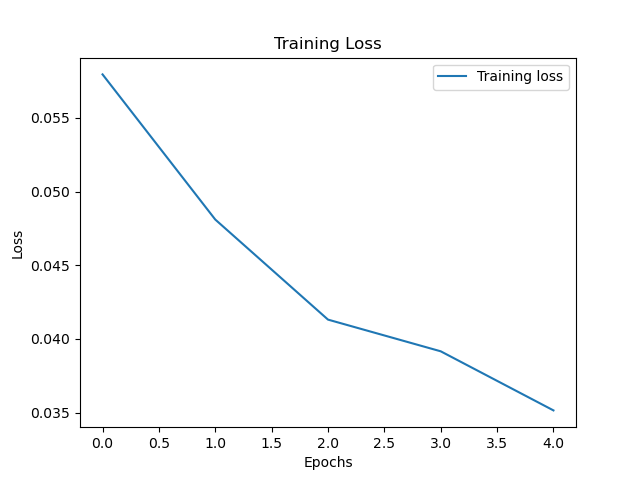

In [34]:
from IPython.display import Image
Image(filename='loss.png')

# Training Accuracy  over 10 epochs

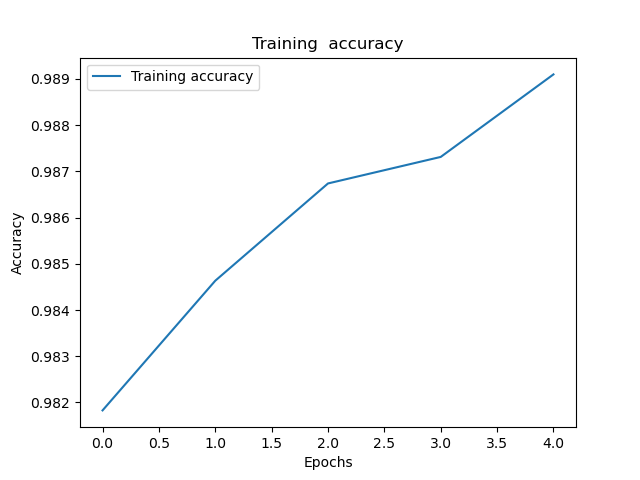

In [36]:
from IPython.display import Image
Image(filename='accuracy.png')